# Work Sample: Ethiopia, data viz examples
## Purpose of this is to produce reproducible code for basic data viz 

# 1. Load packages

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopandas import GeoDataFrame
import imageio
import os
import matplotlib.ticker as ticker
from matplotlib.dates import YearLocator, DateFormatter

# 2. Load datasets

In [3]:
acled = pd.read_csv('/Users/foroghakbari/Documents/GitHub/Example_code/acled_battle_data.csv',sep='\t')

In [4]:
df = acled[acled['iso3']=='ETH'] #ethiopia

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

/var/folders/sf/7stnv88n2y36ft6t7494cr5w0000gn/T/ipykernel_8073/1361045128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
gdf = gpd.read_file('/Users/foroghakbari/Downloads/test/eth_adm_csa_bofedb_2021_shp/eth_admbnda_adm1_csa_bofedb_2021.shp')

In [7]:
fews_22 = gpd.read_file('/Users/foroghakbari/Documents/GitHub/Example_code/ET_202201/ET_202201_ML2.shp')
#shapefile from famine early warning system: https://fews.net/fews-data/333?tid=26&field_data_portal_date_start%5Bvalue%5D%5Byear%5D=2022&field_data_portal_date_start%5Bvalue%5D%5Bmonth%5D=1&field_data_portal_date_end%5Bvalue%5D%5Byear%5D=2023&field_data_portal_date_end%5Bvalue%5D%5Bmonth%5D=1&page=1

# 3. Data Viz

## 3a. data viz of maps, charts and barcharts

/var/folders/sf/7stnv88n2y36ft6t7494cr5w0000gn/T/ipykernel_8073/2315972887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_date'] = pd.to_datetime(df['event_date'])
/var/folders/sf/7stnv88n2y36ft6t7494cr5w0000gn/T/ipykernel_8073/2315972887.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df.groupby(df['event_date'].dt.year).sum()
/var/folders/sf/7stnv88n2y36ft6t7494cr5w0000gn/T/ipykernel_8073/2315972887.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_o

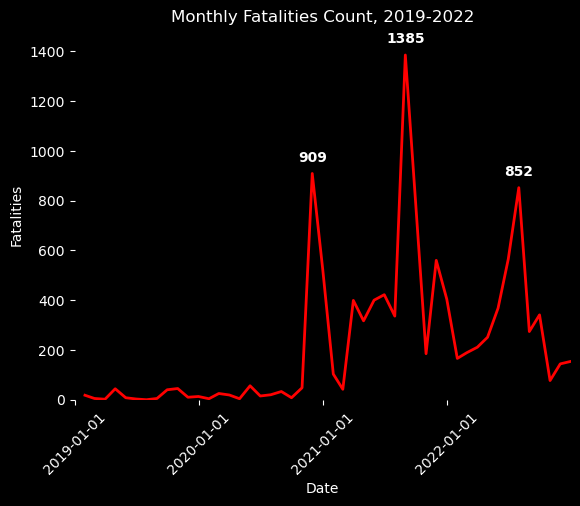

In [8]:
# Convert the 'event_date' column to a datetime object
df['event_date'] = pd.to_datetime(df['event_date'])
# Set the style to dark background
plt.style.use('dark_background')
# Filter the data to the years 2018-2022
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2022-12-31')
df = df[(df['event_date'] >= start_date) & (df['event_date'] <= end_date)]

# Group the data by year and sum the fatalities column
yearly_data = df.groupby(df['event_date'].dt.year).sum()

# Set the 'event_date' column as the index
df = df.set_index('event_date')

# Resample the data by month and sum the fatalities column
monthly_data = df.resample('M').sum()

# Create the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, color='red')
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())
ax.set_ylim(0, monthly_data['fatalities'].max() + 100)
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
ax.set_title('Monthly Fatalities Count, 2019-2022')


# Set the tick positions to be the first day of each year
ax.set_xticks(pd.date_range(start='2019-01-01', end='2022-12-31', freq='YS'))

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

# Plot the data
line.set_data(monthly_data.index, monthly_data['fatalities'])

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')

# Get the top three highest amount of fatalities
top_3 = monthly_data.nlargest(3, 'fatalities')

# Add text annotations for the top three
for i, row in top_3.iterrows():
    plt.annotate(f"{row['fatalities']:.0f}", xy=(i, row['fatalities']), xytext=(i, row['fatalities']+65),
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')
# Show the plot
plt.show()


In [ ]:
df=df.reset_index()

In [ ]:
# Filter the data to the years 2019-2022
df = df[(df['event_date'].dt.year >= 2019) & (df['event_date'].dt.year <= 2022)]

# Group the data by admin1 and sum the fatalities column
admin1_data = df.groupby('admin1')['fatalities'].sum().reset_index()
admin1_data= admin1_data.sort_values('fatalities', ascending=True)

# Create a horizontal bar chart
plt.barh(admin1_data['admin1'], admin1_data['fatalities'], color='red')

# Set the chart title and axis labels
plt.title('Ethiopia, 2019-2022')
plt.xlabel('Fatalities')
plt.ylabel('Admin 1')

plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')



# Show the plot
plt.show()

In [ ]:
# create a list of years to loop through
years = [2019, 2020, 2021, 2022]

# create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# loop through the years and create a map for each year in a subplot
for i, year in enumerate(years):
    # filter the data to only include the specified year
    data = df[df['year'] == year]

    # get the subplot location based on the index
    row = i // 2
    col = i % 2

    # plot the shapefile on the subplot
    axs[row, col].set_title('{}'.format(year))
    gdf.plot(ax=axs[row, col], color='black', edgecolor='white')

    # create a list of sizes based on the number of fatalities
    size = np.zeros(data.shape[0])
    size[(data['fatalities'] > 0) & (data['fatalities'] <= 10)] = 10
    size[(data['fatalities'] > 10) & (data['fatalities'] <= 100)] = 100
    size[(data['fatalities'] > 100) & (data['fatalities'] <= 250)] = 250
    size[(data['fatalities'] > 250)] = 500

    # create a scatter plot with the fatalities data on the subplot
    sc = axs[row, col].scatter(data['longitude'], data['latitude'], edgecolors='red',facecolors='none',marker='o', s=data['fatalities']*1)
    axs[row, col].axis('off')


# create a legend for the bubble sizes
sizes = [10, 100, 250, 500]
labels = ['0-10', '10-100', '100-250', '250+'] 
    
legend_elements = [plt.scatter([], [], s=s, edgecolors='red', facecolors='none', marker='o', label=l) for s, l in zip(sizes, labels)]
legend_labels = ['Number of Fatalities by location**']
axs[0, 0].legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 1.3), ncol=4, frameon=False)
axs[0, 0].legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 1.3), ncol=4, frameon=False, fontsize=20)

# add text to the legend
for i, label in enumerate(legend_labels):
    axs[0, 0].text((i+0.5)/4, 1.2, label, ha='center', va='top', transform=axs[0, 0].transAxes, fontsize=15)
text = fig.text(0.50, 0.02, 
    'Data providers: ACLED * 01/19-12/22, visual: F Akbari', 
     horizontalalignment='center', wrap=True ) 

plt.savefig('/Users/foroghakbari/Documents/GitHub/Example_code/output/map_subplots.png')


In [ ]:
from PIL import Image

# open the two images
img1 = Image.open('/Users/foroghakbari/Documents/GitHub/Example_code/output/charts_1.png')
img2 = Image.open('/Users/foroghakbari/Documents/GitHub/Example_code/output/map_subplots.png')

# get the size of the images
width, height1 = img1.size
_, height2 = img2.size

# create a new image with the combined height
combined_img = Image.new('RGB', (width, height1 + height2))

# paste the first image at the top of the new image
combined_img.paste(img1, (0, 0))

# paste the second image below the first image
combined_img.paste(img2, (0, height1))

# save the combined image as a new PNG file
combined_img.save('/Users/foroghakbari/Documents/GitHub/Example_code/output/Fatalities_dataviz.png')

In [ ]:

img = plt.imread('/Users/foroghakbari/Documents/GitHub/Example_code/output/Fatalities_dataviz.png')

# Create a new figure and axis without axis
fig, ax = plt.subplots(figsize=(15, 15), dpi=300)
ax.axis('off')

# Display the PNG image
ax.imshow(img)

# Show the plot
plt.show()

## 3b. creating a gif of map

In [ ]:
# create a list of years to loop through
years = [2019, 2020, 2021, 2022]

# loop through the years and create a map for each year
for year in years:
    # filter the data to only include the specified year
    data = df[df['year'] == year]

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # plot the shapefile
    gdf.plot(ax=ax, color='black', edgecolor='white')

    # create a list of sizes based on the number of fatalities
    size = np.zeros(data.shape[0])
    size[(data['fatalities'] > 0) & (data['fatalities'] <= 10)] = 10
    size[(data['fatalities'] > 10) & (data['fatalities'] <= 100)] = 100
    size[(data['fatalities'] > 100) & (data['fatalities'] <= 250)] = 250
    size[(data['fatalities'] > 250)] = 500

    # create a scatter plot with the fatalities data
    sc = ax.scatter(data['longitude'], data['latitude'], edgecolors='red',facecolors='none',marker='o', s=data['fatalities']*1)

    # add a colorbar and title to the plot
    plt.title('Ethiopia - {}'.format(year))
    #plt.colorbar(sc)

    # add a legend for the different bubble sizes
    sizes = [10, 100, 250, 500]
    labels = ['0-10', '10-100', '100-250', '250+']
    for size, label in zip(sizes, labels):
        ax.scatter([], [], facecolors='none', edgecolors='red', alpha=0.5, s=size,
                   label=label)
    ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Fatalities by location*')
    plt.axis('off')
    text = fig.text(0.50, 0.02, 
    'Data providers: ACLED * 01/19-12/22, visual: F Akbari', 
     horizontalalignment='center', wrap=True ) 

    # save the figure as a PNG file
    plt.savefig('/Users/foroghakbari/Documents/GitHub/Example_code/output/maps/map_{}.png'.format(year))

In [ ]:
# save as gif
png_dir = '/Users/foroghakbari/Documents/GitHub/Example_code/output/maps'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(5):
    images.append(imageio.imread(file_path))

imageio.mimsave('/Users/foroghakbari/Documents/GitHub/Example_code/output/Fatalities.gif', images, duration=0.7)

In [ ]:
#load gif 
from IPython.display import Image
from IPython.display import display

# Load the GIF image
gif_path = '/Users/foroghakbari/Documents/GitHub/Example_code/output/Fatalities.gif'

# Display the GIF image
with open(gif_path, 'rb') as f:
    display(Image(data=f.read(), format='gif'))

## 3c. Food insecurity and conflict data 

In [ ]:
fews_22['report_mon']

In [ ]:
fews_ad1 = fews_22.drop('ADMIN2',axis=1)

In [ ]:
fews_ad1 = fews_22.dissolve(by='ADMIN1', aggfunc='mean')

In [ ]:
fews_ad1

In [ ]:
fews_ad1['ML2'] = fews_ad1['ML2'].round(decimals=0)

In [ ]:
# define the color map based on category score
colors = {1: 'light green',
          2: 'yellow',
          3: 'orange',
          4: 'red',
          5: 'darkred'}

fews_ad1['color'] = fews_ad1['ML2'].apply(lambda x: colors[x])

In [ ]:
fews_ad1

In [ ]:
fews_ad1=fews_ad1.reset_index()

In [ ]:
import matplotlib.colors as colors

In [ ]:
# define the colors for the rating values
colors_list=[ 'lightgreen','yellow', 'orange', 'red', 'darkred']

#hex_values = ['#FFFF99', '#FFFF00', '#FFA500', '#FF0000', '#8B0000']

# Convert the hex values to a normalized range of 0-1
#hex_normalized = [colors.hex2color(hex_val) for hex_val in hex_values]

# Create the discrete color map with both named colors and hex values
cmap = colors.ListedColormap(colors_list)


bounds = [1, 2, 3, 4, 5]
norm = colors.BoundaryNorm(bounds, cmap.N)


# Define the labels for the color map
labels = ['Minimal', 'Stressed', 'Crisis', 'Emergency', 'Famine']



# plot the administrative area map

In [ ]:
import matplotlib.colors as colors
import matplotlib.patches as mpatches


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

In [ ]:
plt.style.use('default')

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# plot the administrative area map
vmin, vmax = fews_ad1['ML2'].min(), fews_ad1['ML2'].max()
fews_ad1.plot(column='ML2', cmap=cmap,norm=norm,linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

# add labels to the map
#for idx, row in fews_ad1.iterrows():
    #plt.annotate(text=row['ADMIN1'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=8)

# plot the fatalities map for each year
years = [2022]
for year in years:
    # filter the data to only include the specified year
    data = df[df['year'] == year]

    # create a list of sizes based on the number of fatalities
    size = np.zeros(data.shape[0])
    size[(data['fatalities'] > 0) & (data['fatalities'] <= 10)] = 10
    size[(data['fatalities'] > 10) & (data['fatalities'] <= 100)] = 100
    size[(data['fatalities'] > 100) & (data['fatalities'] <= 250)] = 250
    size[(data['fatalities'] > 250)] = 500

    # create a scatter plot with the fatalities data
    sc = ax.scatter(data['longitude'], data['latitude'], edgecolors='blue',facecolors='none',marker='o', s=data['fatalities']*1)

    # add a legend for the different bubble sizes
    sizes = [10, 100, 250, 500]
    labels = ['0-10', '10-100', '100-250', '250+']
    for size, label in zip(sizes, labels):
        ax.scatter([], [], facecolors='none', edgecolors='blue', alpha=0.5, s=size,
                   label=label)


# add a legend for the fatalities data
first_legend=plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Fatalities by location*', fontsize=15)
# Add legend color patches for each color in the color map
ax.add_artist(first_legend)

legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_list, ['Minimal', 'Stressed', 'Crisis', 'Emergency', 'Famine'])]
second_legend=plt.legend(handles=legend_patches, frameon=False, loc='lower left',mode='expand',ncol=5,bbox_to_anchor=(0.0, -0.1, 1.0, 0.1), title='IPC Acute food insecurity phase**')
ax.add_artist(second_legend)

# Add a title to the plot
ax.set_title('Ethiopia', fontsize=30,loc='left')

# Remove the axis spines and ticks
ax.axis('off')

# add a text annotation
text = fig.text(0.3, 0.02, 'Data providers: ACLED*(01/22 to 12/22) and FEWS** (02/22 to 05/22), visual: F Akbari', horizontalalignment='center', wrap=True, fontsize=8)
# Add the legend for the color patches as a separate artist on the same axis



# save the figure as a PNG file
plt.savefig('/Users/foroghakbari/Documents/GitHub/Example_code/output/map_combined.png')
